# Деревья решений
Шестаков А.В., Панов А.И. Майнор по анализу данных 12/04/2016

На прошлых занятиях мы рассматривали **линейные** модели классификации и регрессии. Деревья решений - совсем другая история. Во-первых, потому что их можно использовать и для регрессии и для классификации, а во-вторых линейностью там только слегка веет.

Формально, деревья решений можно представить в виде вложенного набора правил "Если - То", но гораздо нагляднее изображать их именно в виде дерева.

Например, дерево может выглядеть так:

<img src='https://raw.githubusercontent.com/alexeygrigorev/wiki-figures/master/ufrt/kddm/decision-tree-ex-tit.png'>

Или вот так:

<img src='http://scikit-learn.org/stable/_images/iris.svg'>

### Классификация с деревьями решений

Давайте попробуем вспомнить, как они стоятся. Рассмотрим следующий набор данных


| ID | Refund | Marital Status | Income | Cheat
|-
| 1 | Yes | Single | 125K | No
| 2 | No | Married | 100K | No
| 3 | No | Single | 70K | No
| 4 | Yes | Married | 120K | No
| 5 | No | Divorced | 95K | Yes
| 6 | No | Married | 60K | No
| 7 | Yes | Divorced | 220K | No
| 8 | No | Single | 85K | Yes
| 9 | No | Married | 75K | No
| 10 | No | Single | 90K | Yes


Имеем 3 признака и класс *Cheat*. Нужно выбрать признак, который наилучшим образом дифференцирует между классами. Посчитать это можно с помощью Impurity Measures и прироста информации:

**Impurity Measures: (меры неравенства\неопределенности)**
* Gini index $I(S) = 1 - \sum\limits_k (p_k)^2$
* Entropy  $I(S) = -\sum\limits_k p_k \log(p_k)$
* Missclassification error  $I(S) = 1 - \max\limits_k p_k$

$p_k$ - доля класса $k$ в узле дерева $S$

**Прирост информации: (насколько уменьшится неопределенность)** <br/>
$$ Gain(S, A) = I(S) - \sum\limits_v\frac{|S_v|}{|S|}\cdot I(S_v),$$ где $A$ - это некий атрибут, а $v$ - его значения

Например, для нашей таблицы:
$$I(S) = -(\frac{3}{10}\log(\frac{3}{10}) + \frac{7}{10}\log(\frac{7}{10})) = 0.61$$

Возьмем, например, атрибут *Marital Status*

$$Gain(S, \text{'Marital Status'}) = I(S) - (\frac{4}{10}\cdot I(S_{single}) + \frac{2}{10}\cdot I(S_{divorced}) + \frac{4}{10}\cdot I(S_{married})) =  0.14$$

Проделаем тоже самое для остальных атрибутов..

In [22]:
## Your code here

In [14]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [15]:
clf.predict([[2., 2.]])

array([1])

In [16]:
clf.predict_proba([[2., 2.]])

array([[ 0.,  1.]])

In [17]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

### Как посмотреть на деревья?

In [18]:
def get_code(tree, feature_names):
        left      = tree.tree_.children_left
        right     = tree.tree_.children_right
        threshold = tree.tree_.threshold
        features  = [feature_names[i] for i in tree.tree_.feature]
        value = tree.tree_.value

        ### Your recursive funtion of print

In [19]:
get_code(clf, iris.feature_names)

In [8]:
from sklearn.externals.six import StringIO
with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

Затем можно с помощью [Graphviz](http://www.graphviz.org/Download..php) создать pdf или другой поддерживаемый тип файла: `dot -Tpdf iris.dot -o iris.pdf`

In [9]:
from sklearn.externals.six import StringIO  
import pydot 
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph.write_pdf("iris.pdf")

ImportError: No module named 'pydot'

In [8]:
from IPython.display import Image  
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

NameError: name 'pydot' is not defined

In [20]:
clf.predict(iris.data[:1, :])

array([0])

In [21]:
clf.predict_proba(iris.data[:1, :])

array([[ 1.,  0.,  0.]])

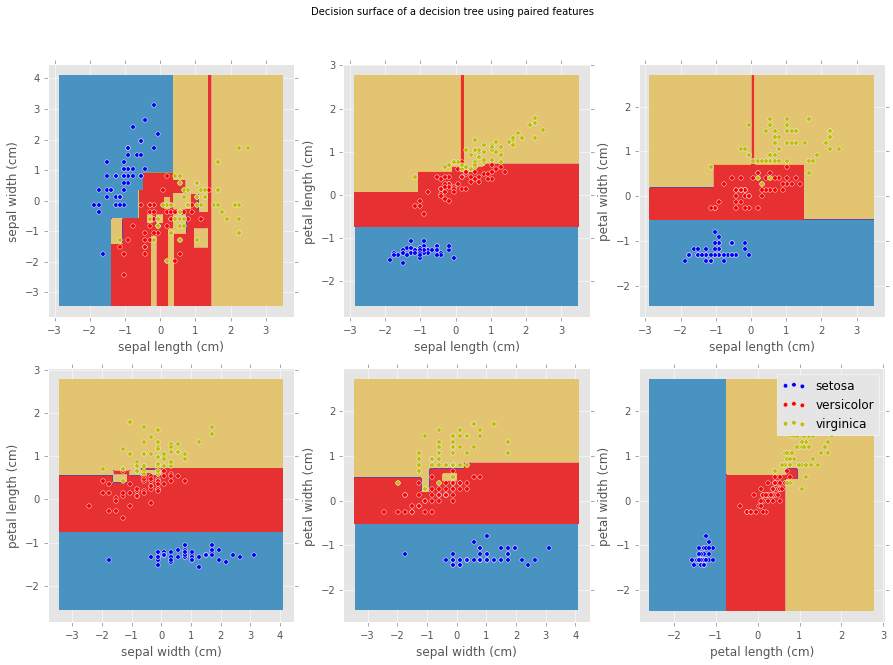

In [22]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = load_iris()
plt.rcParams["figure.figsize"] = [15,10]

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Shuffle
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    # Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    # Train
    clf = tree.DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

In [39]:
iris

{'DESCR': 'Iris Plants Database\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ====================\n\n

### Регрессия с деревьями решений

В этом случае всё очень похоже, с той разницой, что мы будем пытаться уменьшить среднюю квадратичную ошибку
$$I(S) = \frac{1}{|S|} \sum\limits_{i \in S} (y_i - c)^2 $$ 
$$ c = \frac{1}{|S|}\sum\limits_{i \in S} y_i $$

In [23]:
from sklearn import tree
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
clf.predict([[1, 1]])

array([ 0.5])

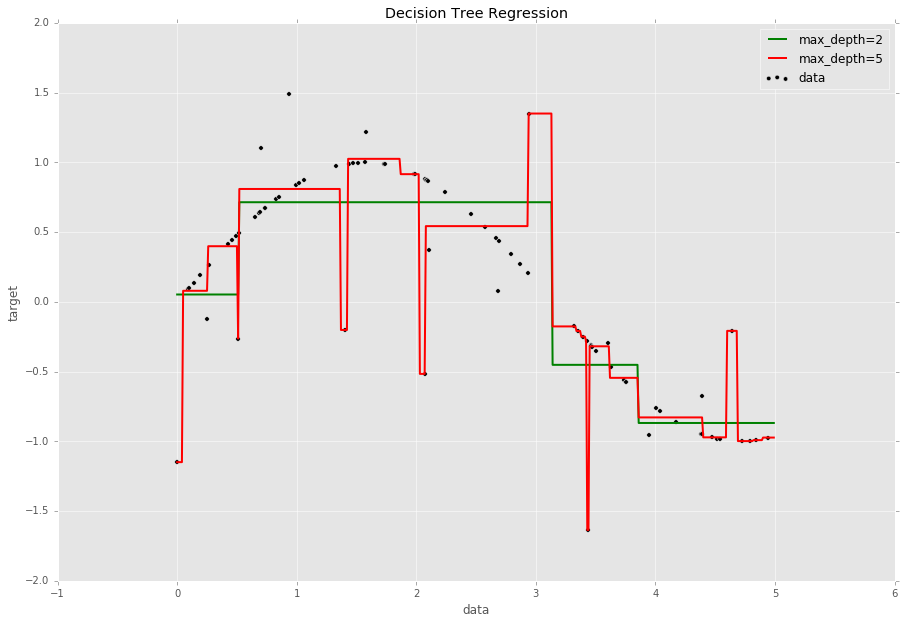

In [24]:
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = tree.DecisionTreeRegressor(max_depth=2)
regr_2 = tree.DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="data")
plt.plot(X_test, y_1, c="g", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, c="r", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

### Перейдем к заданию

Загрузите [данные](https://www.dropbox.com/s/3t1moa1wpflx2u9/california.dat?dl=0).

**Задание 1:** Найти оптимальную глубину дерева.<br/>
Разделите выборку на train-test в пропорции 70/30.<br/>
Обучите деревья с глубиной от `1` до `30`. Для каждой глубины расчитайте среднюю квадратичную ошибку на train и на test<br/>
Изобразите эти ошибки на одном графике, сделайте вывод по поводу оптимальной глубины дерева.

In [77]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split

Загружаем данные

In [78]:
cali = pd.read_csv('california.dat', sep=',')

Разделяем данные 70 на 30

In [79]:
train, test = train_test_split(cali, test_size = 0.3)

Отделяем оцениваемый столбец

In [102]:
X = train[train.columns[0:8]].as_matrix()
X_test = test[test.columns[0:8]].as_matrix()
y_test = test['MedianHouseValue'].as_matrix()
y = train['MedianHouseValue'].as_matrix()

Обущаем деревья разной глубины, применяем их и заносим ошибку в массив

In [104]:
a = []
for i in range(1, 31):
    regr = tree.DecisionTreeRegressor(max_depth=i)
    regr.fit(X, y)
    y_p = regr.predict(X_test)
    a.append(mean_squared_error(y_test, y_p))

Рисуем и выводим дерево оптимальной глубины

min MSE is:, 3749995144.88, optimum depth is, 10


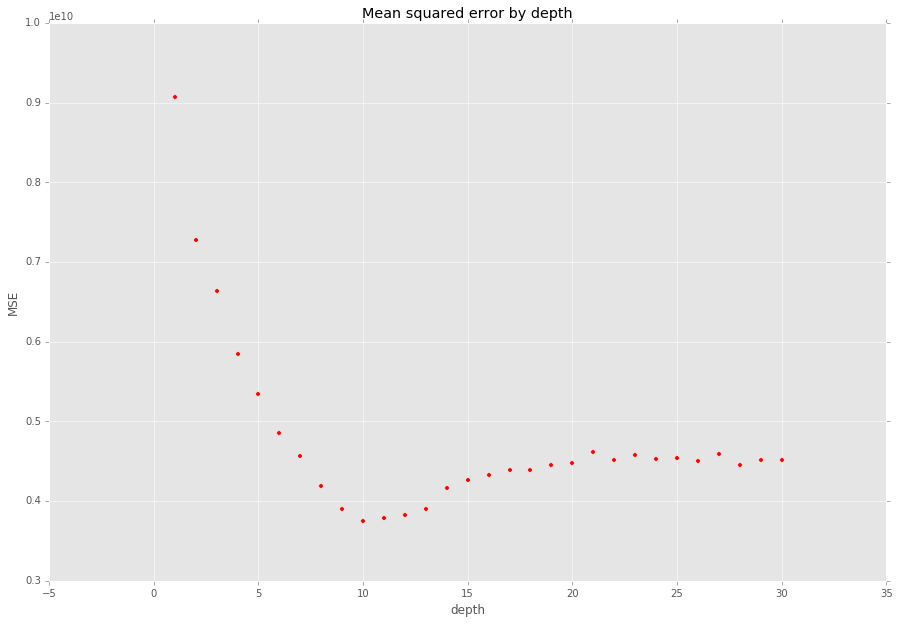

In [113]:


x_axis = np.arange(1,31) 
y_axis = np.asarray(a) 
plt.figure() 
plt.scatter(x_axis, y_axis, c="r") 
plt.xlabel("depth")
plt.ylabel("MSE")
plt.title("Mean squared error by depth")


print('min MSE is:',y_axis.min(), 'optimum depth is', np.argmin(y_axis)+1, sep = ', ')

**Задание 2:** Выведите важности признаков. Для этого воспользуйтесь `DecisionTreeRegressor.feature_importances_`

In [114]:
importances = tree.DecisionTreeRegressor().fit(X,y).feature_importances_
importances

array([ 0.17735689,  0.15680593,  0.06154717,  0.03053674,  0.01669539,
        0.02879081,  0.01801967,  0.51024741])

**Задание 3:** Поразмышляйте на темы:
* Обработки пропусков в данных.
* Как сделать разделяющие плоскости непараллельные осям?

1. Обрабатка пропусков данных.
Существует несколько методов работы с пропущенными данными. 
Первый и самый простой - просто убрать все преценденты с пропущенными данными из модели. Это безусловно сильно негативно скажется на точности модели, но зато упрощает работу.
Второй подход - как-то заполнить пропущенные данные. В замисимости от модели пропуски могут заполняться по-разному. Можно брать средние значения, нули, единицы, и т.д. При удачном стечении обстоятельств, это даже может несильно повлиять на точность оценки.
Третий подход - оценка вероятности пропуска и внедрение ее в модель. Это возможно не всегда, но в некоторых случаях использование этого подхода оптимально, однако в случае с деревьями может привести к переобучению.

2. Как сделать разделяющие плоскости непараллельные осям?
Из той информации, что я нашел, можно сделать вывод, что при применении решающих деревьев, разделяющие оси всегда будут параллельны осям. Это является одной из причин не идеальной универсальности данного метода.